In [30]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler 
import numpy as np

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE, Isomap

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, rand_score, make_scorer, calinski_harabasz_score

## Классификация

In [31]:
data_classification= pd.read_csv('Data4.csv')

In [32]:
data_classification.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False


In [33]:
data_classification.isna().sum()

id                    570
name                   46
est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [34]:
data_classification['id']=data_classification['id'].map(lambda y: np.random.uniform(((data_classification['id'].min()).round()), ((data_classification['id'].max()).round()) if pd.isna(y) else y))

In [35]:
data_classification['est_diameter_max']=data_classification['est_diameter_max'].map(lambda y: np.random.uniform(((data_classification['est_diameter_max'].min()).round()), ((data_classification['est_diameter_max'].max()).round()) if pd.isna(y) else y))

In [36]:
data_classification['relative_velocity']=data_classification['relative_velocity'].map(lambda y: np.random.uniform(((data_classification['relative_velocity'].min()).round()), ((data_classification['relative_velocity'].max()).round()) if pd.isna(y) else y))

In [37]:
data_classification['absolute_magnitude']=data_classification['absolute_magnitude'].map(lambda y: np.random.uniform(((data_classification['absolute_magnitude'].min()).round()), ((data_classification['absolute_magnitude'].max()).round()) if pd.isna(y) else y))

In [38]:
data_classification.drop(['name'],axis=1, inplace=True)
data_classification.loc[(data_classification['hazardous'] == "True"), 'hazardous'] = 1
data_classification.loc[(data_classification['hazardous'] == "False"), 'hazardous'] = 0
for i in data_classification:
    data_classification[i]=data_classification[i].astype('float32')
data_classification.head(20)

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2243876.75,0.016016,0.030963,2358.060059,1024333.0,12.508282,0.0
1,5021729.50,0.030518,0.020713,332.421814,32681860.0,14.399261,0.0
2,3512938.50,0.055533,0.123087,43289.816406,65386360.0,9.887812,0.0
3,2981826.00,0.019256,0.042235,11693.472656,12607958.0,9.058173,0.0
4,3233676.75,0.139494,0.258147,30881.128906,71305896.0,12.903506,0.0
5,2029159.25,0.046191,0.089661,5247.950684,28470830.0,22.129448,0.0
6,3771852.00,0.116026,0.213588,32212.660156,34184168.0,19.868961,0.0
7,3115268.50,0.021113,0.029726,15632.286133,26531536.0,19.326948,0.0
8,2349436.00,0.221083,0.399945,19486.009766,56706616.0,13.853748,0.0
9,2301411.00,0.242412,0.340560,41419.074219,61754412.0,12.700557,0.0


In [39]:
data_classification['hazardous']=data_classification['hazardous'].astype('int32')
data_classification = data_classification.sort_values(by='hazardous', ascending=False)

In [40]:
data_classification[data_classification['hazardous'] == 0].shape, data_classification[data_classification['hazardous'] == 1].shape

((81996, 7), (8840, 7))

In [41]:
X = data_classification.drop(['hazardous'], axis=1)
y = data_classification['hazardous']
X.shape, y.shape

((90836, 6), (90836,))

In [42]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [43]:
np.random.seed(42)
test(X, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.97      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Отбор признаков

## 1.1 Отбираем признаки с высокой дисперсией (VarianceThreshold)

In [44]:
vt = VarianceThreshold(2)
X_vt = vt.fit_transform(X)
X_vt.shape

(90836, 5)

In [45]:
X_vt = pd.DataFrame(X_vt, columns=vt.get_feature_names_out())
X_vt.head()

,id,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2061341.000,0.497027,13878.557617,47682200.0,13.420166
1,2402555.000,0.204562,15251.227539,74246440.0,16.163881
2,2490818.250,0.316625,13898.196289,32798368.0,12.809849
3,2002347.375,0.135275,49702.734375,58210972.0,14.608346
4,2012230.375,1.057398,5628.548340,38861144.0,12.601048


In [46]:
test(X_vt, y)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.98     13626
   macro avg       0.50      0.49      0.49     13626
weighted avg       1.00      0.98      0.99     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,-0.493652,1.325358,0.042654,-0.493852,0.474933,-0.630398
1,-0.466609,0.062430,-0.042830,-0.431445,1.663387,-0.028518
2,-0.459614,0.567587,-0.010075,-0.492959,-0.190954,-0.764282
3,-0.498327,2.866143,-0.063082,1.134854,0.945978,-0.369751
4,-0.497544,1.809749,0.206444,-0.868929,0.080288,-0.810085


In [48]:
vt = VarianceThreshold(1)
X_vt = vt.fit_transform(X_scaled)
print(X_vt.shape)
test(X_vt, y)

(90836, 3)
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.96     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.96      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.2 Одномерный отбор признаков (SelectKBest)

In [49]:
skb = SelectKBest(k=6)
X_skb = skb.fit_transform(X, y)
test(X_skb, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13626
   macro avg       0.50      0.49      0.49     13626
weighted avg       1.00      0.97      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
X_skb = pd.DataFrame(X_skb, columns=skb.get_feature_names_out())
X_skb

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2.061341e+06,0.523064,0.497027,13878.557617,47682200.0,13.420166
1,2.402555e+06,0.146068,0.204562,15251.227539,74246440.0,16.163881
2,2.490818e+06,0.296862,0.316625,13898.196289,32798368.0,12.809849
3,2.002347e+06,0.983003,0.135275,49702.734375,58210972.0,14.608346
4,2.012230e+06,0.667659,1.057398,5628.548340,38861144.0,12.601048
...,...,...,...,...,...,...
90831,6.059330e+06,0.049267,0.056974,12321.358398,33882404.0,19.325191
90832,2.105934e+06,1.176400,0.701739,80225.617188,40479276.0,9.454386
90833,2.077947e+06,0.119277,0.241062,22563.400391,49153164.0,20.950998
90834,2.878913e+07,0.022108,0.045437,3852.715576,31913668.0,19.312750


## 1.3 Рекурсивный отбор признаков (RFE)

In [51]:
tree = DecisionTreeClassifier().fit(X, y)

In [52]:
rfe = RFE(estimator=tree, n_features_to_select=4, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
X_rfe

,id,est_diameter_min,relative_velocity,miss_distance
0,2.061341e+06,0.523064,13878.557617,47682200.0
1,2.402555e+06,0.146068,15251.227539,74246440.0
2,2.490818e+06,0.296862,13898.196289,32798368.0
3,2.002347e+06,0.983003,49702.734375,58210972.0
4,2.012230e+06,0.667659,5628.548340,38861144.0
...,...,...,...,...
90831,6.059330e+06,0.049267,12321.358398,33882404.0
90832,2.105934e+06,1.176400,80225.617188,40479276.0
90833,2.077947e+06,0.119277,22563.400391,49153164.0
90834,2.878913e+07,0.022108,3852.715576,31913668.0


In [53]:
test(X_rfe, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.97      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.4 Отбор признаков по их значимости

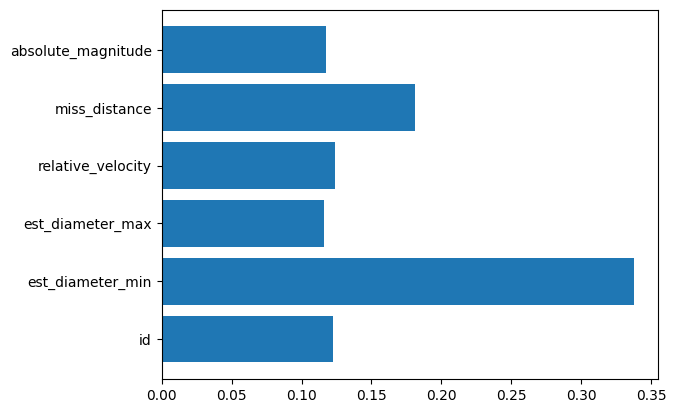

In [54]:
plt.barh(width=tree.feature_importances_, y=X.columns);

# 2. Выделение признаков

## 2.1 Метод главных компонент (PCA)

In [55]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)
X_pca.shape

(90836, 2)

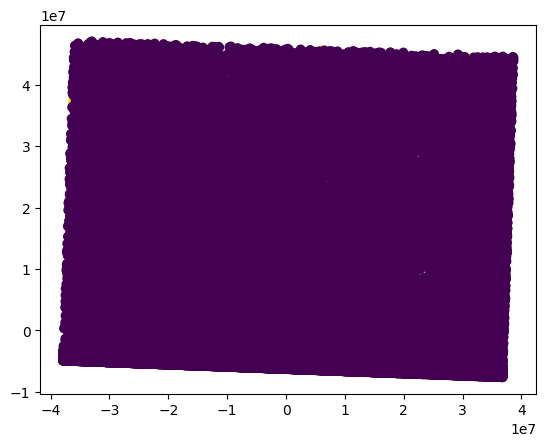

In [56]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y);

In [57]:
sum(pca.explained_variance_ratio_)

0.9999989900525196

In [58]:
test(X_pca, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.97      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
pca_2 = PCA(n_components=3)
X_pca_2 = pca_2.fit_transform(X, y)

In [60]:
test(X_pca_2, y)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.98     13626
   macro avg       0.50      0.49      0.50     13626
weighted avg       1.00      0.98      0.99     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


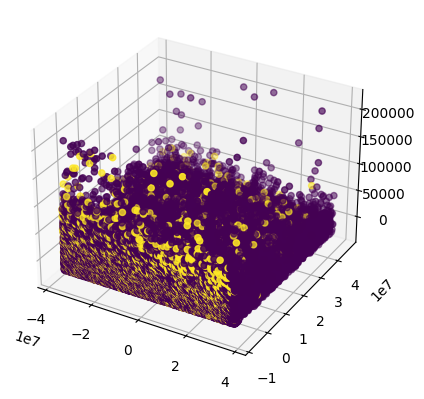

In [61]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_2[:,0], X_pca_2[:,1], X_pca_2[:,2], c=y);

## 2.2 Нелинейные методы выделения признаков (TSNE, Isomap)

In [63]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

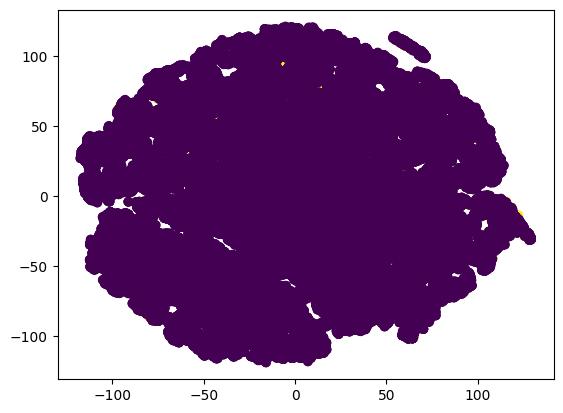

In [64]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y);

In [65]:
test(X_tsne, y)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.95     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.95      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_scaled[:10000])

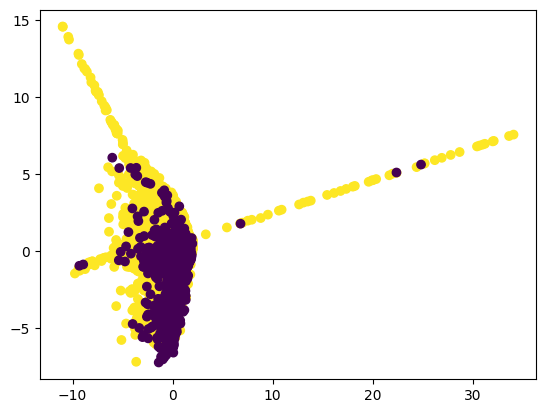

In [67]:
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y[:10000]);

D:\environment\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


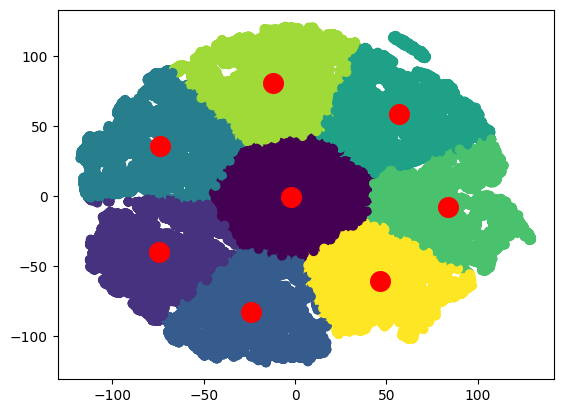

In [68]:
kmeans = KMeans(n_clusters=8).fit(X_tsne)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200);

In [69]:
silhouette_score(X_tsne, kmeans.labels_)

0.3608732

## Обучение

In [70]:
Y = y
X = X_vt

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [72]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [73]:
y_bin_knn_pred = knn.predict(X_test)

In [74]:
print(classification_report(Y_test, y_bin_knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     27111
           1       0.31      0.09      0.14      2865

    accuracy                           0.89     29976
   macro avg       0.61      0.54      0.54     29976
weighted avg       0.85      0.89      0.87     29976



## Реализация PCA

In [75]:
X_meaned = X_scaled - np.mean(X_scaled , axis = 0)

In [76]:
cov_mat = np.cov(X_meaned , rowvar = False)

In [77]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

In [78]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [79]:
n_components = 2 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [80]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

In [81]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [82]:
mat_reduced = PCA(X_scaled , 2)

In [83]:
test(mat_reduced, y)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     13626
           1       0.00      0.00      0.00         0

    accuracy                           0.97     13626
   macro avg       0.50      0.48      0.49     13626
weighted avg       1.00      0.97      0.98     13626



D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\environment\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: xlabel='PC1', ylabel='PC2'>

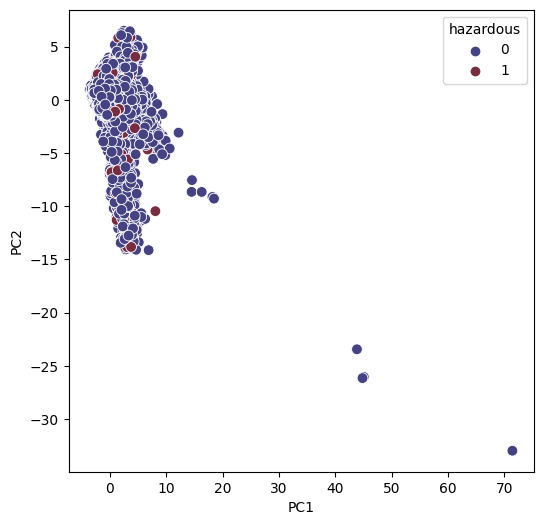

In [85]:
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
principal_df = pd.concat([principal_df , pd.DataFrame(y)] , axis = 1)
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'hazardous' , s = 60 , palette= 'icefire')

### Кластеризация с собственной реализацией KMean

In [86]:
class KMeans_:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centers = X[np.random.choice(len(X), self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centers == new_centers):
                break

            self.centers = new_centers

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)

In [87]:
kmeans_o = KMeans_()

In [88]:
kmeans_o.fit(X_train)

In [89]:
pred = kmeans_o.predict(X_test)

In [90]:
print('silhouette_score', round(silhouette_score(X_test, pred), 2))
print('calinski_harabasz_score', round(calinski_harabasz_score(X_test, pred),2))
print('rand_score', round(rand_score(pred, Y_test), 2))
print('adjusted_rand_score', round(adjusted_rand_score(Y_test, pred), 2))

silhouette_score 0.32
calinski_harabasz_score 8191.4
rand_score 0.5
adjusted_rand_score -0.01
